# Are horror movies rated better than comedy?

#### by Adam Petržela

In [1]:
# importing the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path1 = r"./Week-4-Pandas/movielens/movies.csv"
path2 = r"./Week-4-Pandas/movielens/ratings.csv"
data1 = pd.read_csv(path1, index_col="movieId")
data2 = pd.read_csv(path2, index_col="movieId")
# We want to use both our movie and ratings file

/Users/badmood111/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
data = data1.join(data2)
data.head(10)
# So we join the dataframes together!

,title,genres,userId,rating,timestamp
movieId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.0,3.5,1.141416e+09
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0,1.439472e+09
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,3.0,1.573944e+09
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.586259e+08
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.0,4.0,8.904925e+08
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10.0,3.5,1.227571e+09
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,12.0,4.0,1.167583e+09
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13.0,4.0,1.265224e+09
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18.0,3.0,1.108273e+09


In [4]:
data.rating = pd.DataFrame(data.groupby(data.index).rating.mean())
data.head()
# we make the rating the mean for each movie

,title,genres,userId,rating,timestamp
movieId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.0,3.893708,1.141416e+09
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,3.893708,1.439472e+09
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,3.893708,1.573944e+09
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,3.893708,8.586259e+08
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.0,3.893708,8.904925e+08


In [5]:
del data["userId"]
del data["timestamp"]
data.head()
# we delete the columns we don't use

,title,genres,rating
movieId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708


In [6]:
data = data.drop_duplicates()
data.head()
# now we drop all duplicate rows 

,title,genres,rating
movieId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708
2,Jumanji (1995),Adventure|Children|Fantasy,3.251527
3,Grumpier Old Men (1995),Comedy|Romance,3.142028
4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547
5,Father of the Bride Part II (1995),Comedy,3.058434


In [7]:
data = data.dropna()
data.head()
# we can't work with movies, that have rating missing. goodbye :c

,title,genres,rating
movieId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708
2,Jumanji (1995),Adventure|Children|Fantasy,3.251527
3,Grumpier Old Men (1995),Comedy|Romance,3.142028
4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547
5,Father of the Bride Part II (1995),Comedy,3.058434


##### The data is now ready!

In [8]:
horror_mask = data.genres.str.contains("Horror")
comedy_mask = data.genres.str.contains("Comedy")

hor = data[horror_mask]
com = data[comedy_mask]
hor.head()

,title,genres,rating
movieId,,,
12,Dracula: Dead and Loving It (1995),Comedy|Horror,2.624566
22,Copycat (1995),Crime|Drama|Horror|Mystery|Thriller,3.320017
70,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller,3.326569
92,Mary Reilly (1996),Drama|Horror|Thriller,2.850047
93,Vampire in Brooklyn (1995),Comedy|Horror|Romance,2.491994


/Users/badmood111/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/badmood111/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


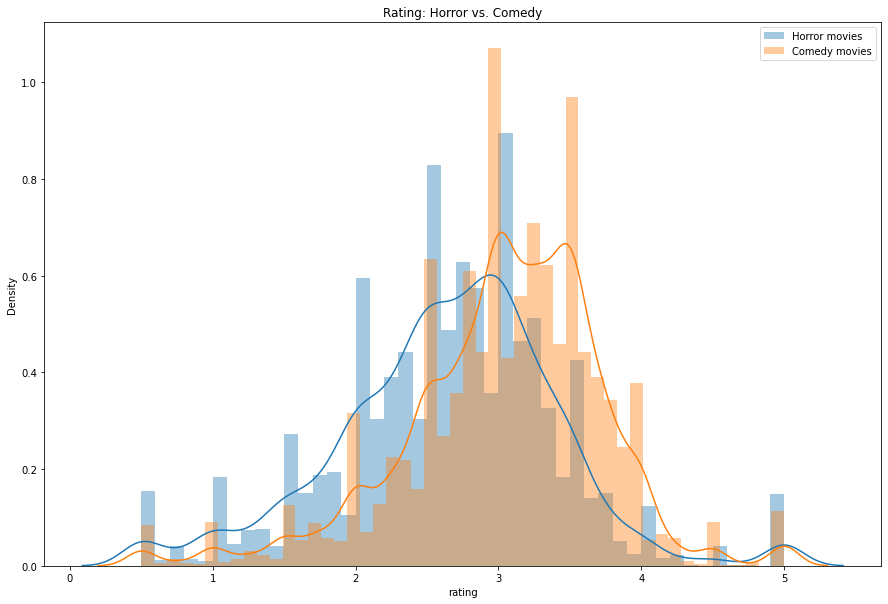

In [9]:
plt.figure(figsize=(15, 10))  # set the plot size
plt.title("Rating: Horror vs. Comedy")  # set the plot title

sns.distplot(a=hor.rating, label="Horror movies", kde=True)  # plotting the horror movies ratings
sns.distplot(a=com.rating, label="Comedy movies", kde=True)  # plotting the comedy movies ratings

plt.legend()  # show the legend
plt.show()

**The graph clearly shows, that comedy movies are more right on the "rating" spectrum, than horror movies.**

**This indicates, that comedy movies, are on average better, than horror movies!**

*Note, that this is a single dataset of reviews from a single source, so the conclusion might not be strictly right.*

# Bonus: which movie category is rated the highest?

In [11]:
data.head()  # this is our clean dataset

,title,genres,rating
movieId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708
2,Jumanji (1995),Adventure|Children|Fantasy,3.251527
3,Grumpier Old Men (1995),Comedy|Romance,3.142028
4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547
5,Father of the Bride Part II (1995),Comedy,3.058434


In [12]:
split_genres = data.genres.str.split("|")  # series with: index - movieId and values - arrays of genres

all_genres=np.array([])

for genres_lists in split_genres:
    for genre in genres_lists:
        if genre not in all_genres:
            all_genres = np.append(all_genres, genre)

print(all_genres)
# we now know all the unique genres of the movies in this dataset!

/var/folders/t_/kt4phlmx5_jdfvnnmdpgdwbm0000gn/T/ipykernel_1185/1010575783.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if genre not in all_genres:


['Adventure' 'Animation' 'Children' 'Comedy' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Mystery' 'Sci-Fi' 'IMAX'
 'Documentary' 'War' 'Musical' 'Western' 'Film-Noir' '(no genres listed)']


In [14]:
average = np.array([])  # this will be the array with all average rating values
for genre in all_genres:  # all genre names
    genre_data = data[data.genres.str.contains(genre)]
    average = np.append(average,  genre_data.rating.mean(axis=0))
# this doesn't work. please fix this. this sucks. fucking shittt.

/var/folders/t_/kt4phlmx5_jdfvnnmdpgdwbm0000gn/T/ipykernel_1185/717998633.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  genre_data = data[data.genres.str.contains(genre)]


In [17]:
genre_average = pd.DataFrame(data=average, index=all_genres, columns=["Rating"])
genre_average

,Rating
Adventure,3.011600
Animation,3.101145
Children,3.033051
Comedy,3.041878
Fantasy,3.020801
Romance,3.147095
Drama,3.178996
Action,2.926390
Crime,3.092680
Thriller,2.944456


No handles with labels found to put in legend.


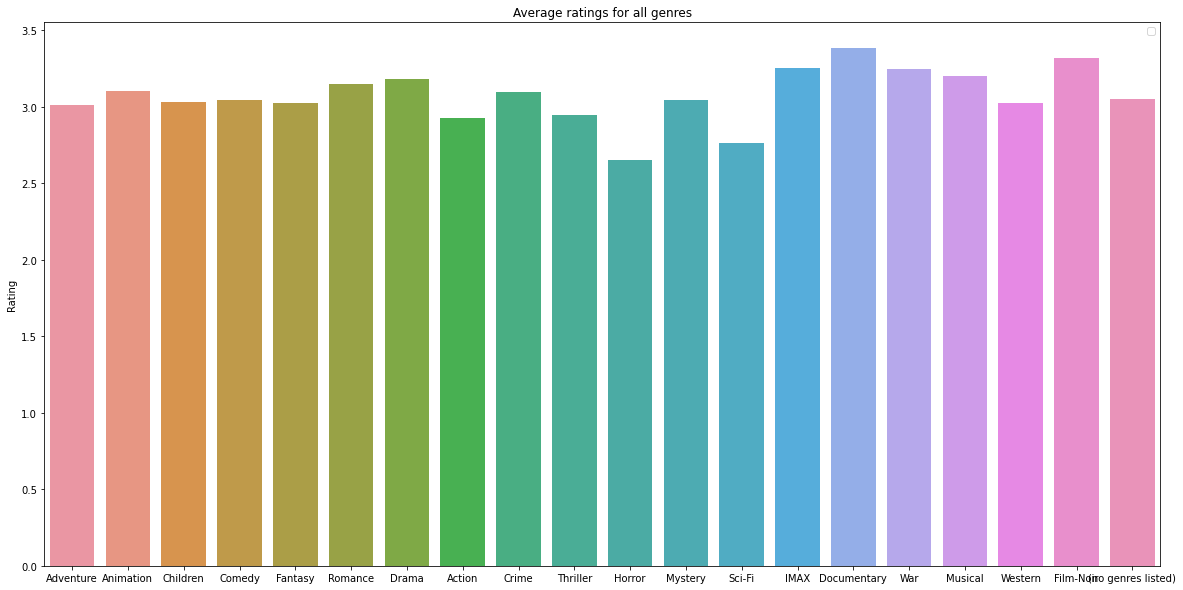

In [26]:
plt.figure(figsize=(20, 10))  # set the plot size
plt.title("Average ratings for all genres")  # set the plot title

sns.barplot(x=genre_average.index, y=genre_average["Rating"])

plt.show()

### As we can see, the highest average rating of all movie genres has the genre **Documentary**!

In [35]:
print("Maximum value is:\n", genre_average["Rating"].idxmax(), "-", genre_average["Rating"].max())
# just making sure :D

Maximum value is:
 Documentary - 3.3824928113927615


## Thank you for seeing my data analysis!

# Adam Petržela